In [2]:
 !pip install -U --no-cache-dir pymoo

     |████████████████████████████████| 3.7MB 9.6MB/s 
     |████████████████████████████████| 245kB 43.7MB/s 
  Created wheel for pymoo: filename=pymoo-0.4.2.2-cp37-cp37m-linux_x86_64.whl size=4939862 sha256=dede407ec71bab42f9be6e7cfa1ef32f0c7cf5043da35c7109a00f961770c440
  Stored in directory: /tmp/pip-ephem-wheel-cache-nrglej78/wheels/95/13/7a/b9489d4dc66ef0b7d03f6cc3be7535b9b2f18d83893437ad7c
Successfully built pymoo


https://github.com/baopng/NSGA-II

https://pymoo.org/getting_started.html?fbclid=IwAR0NJaQmJhu1YiWuY1X2P2MyeZHH998SuM7BK9dINAWJUzdUURlOg2X1y_Q

In [11]:
import numpy as np 
from pymoo.util.misc import stack
from pymoo.model.problem import Problem
from pymoo.model.problem import FunctionalProblem
from pymoo.visualization.scatter import Scatter

In [12]:
import numpy as np
from pymoo.model.problem import Problem
#on pose m = 1280
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=5,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-5,-5,-5,-5,-5]),
                         xu=np.array([12800,12800,12800,12800,12800]))
    #X[:,0] = Y
    #X[:,1] = C
    #X[:,2] = Z
    #X[:,3] = D
    #X[:,4] = X
    def _evaluate(self, X, out, *args, **kwargs):
        f1 = X[:,0]*X[:,1] + X[:,0]*X[:,1] + X[:,2]*X[:,1]*X[:,3]
        f2 = X[:,0]*X[:,1]

        g1 = X[:,4]-1
        g2 = X[:,2]-1

        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2])


vectorized_problem = MyProblem()

In [13]:
import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, *args, **kwargs):
        return func_pf(**kwargs)

    def _calc_pareto_set(self, *args, **kwargs):
        return func_ps(**kwargs)

test_problem = MyTestProblem()

In [14]:
problem = MyProblem()

In [15]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=50,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)


In [16]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 40)

In [17]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      50 |  1.32573E+03 |  1.32757E+04 |       1 |            - |            -
    2 |      60 |  1.30104E+03 |  1.05682E+04 |       1 |  6.70467E+07 |        ideal
    3 |      70 |  1.30104E+03 |  8.66239E+03 |       1 |  0.00000E+00 |            f
    4 |      80 |  1.30104E+03 |  7.04343E+03 |       1 |  0.00000E+00 |            f
    5 |      90 |  1.30104E+03 |  6.10135E+03 |       1 |  0.00000E+00 |            f
    6 |     100 |  1.30104E+03 |  4.99137E+03 |       1 |  0.00000E+00 |            f
    7 |     110 |  1.03946E+03 |  3.95751E+03 |       1 |  1.89232E+10 |        ideal
    8 |     120 |  1.03769E+03 |  3.07802E+03 |       1 |  1.64061E+10 |        ideal
    9 |     130 |  1.76541E+02 |  2.30799E+03 |       1 |  3.20926E+06 |        ideal
   10 |     140 |  1.76541E+02 |  1.82736E+03 |       1 |  0.00000E+00 |            f
   11 |     150 |  1.76541E+02 |  1.56840E+03 |       

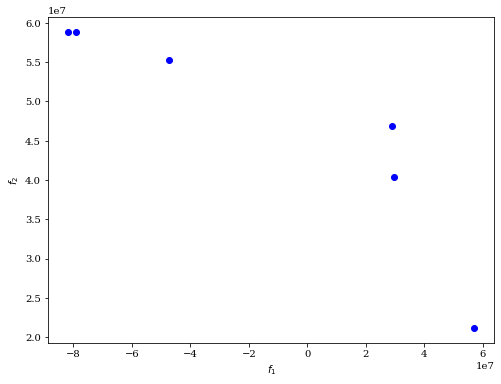

In [18]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="blue")
plot.show()